# Project: Exploring relationships within the IMDB movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [82]:
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### The columns seem to have some problems. There are many unnecessary columns like tagline and overview which will not have a significant effect on the other variables in this dataset. 

#### Checking for missing values....

In [83]:
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Well....

#### Four of the columns with missing values (imdb_id,homepage,keywords,overview) don't seem to contrbute much to the dataset...


## Let me explore some stats in my dataset

In [84]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Some more problems with the data in this dataset...


#### 1) The budget and revenue columns are zero in their 25th and 50th quartiles. I checked the page on Kaggle and it has been mentioned that the data is associated with films which have a very small budget and revenue (in comparison to films which have a budget and revenue greater than a hundred million dollars), hence the zeroes in that place.

#### 2) The same problem is faced by the budget_adj and revenue_adj columns. (The columns which account of the inflation around 2010)

#### 3) The statistics in the ID column most ceratinly will not play a big role in identifying relationships within this dataset


### Checking the datatypes of all the columns in this dataset

In [85]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Another problem...

#### The Genre column in this dataset contains some floating point values (instead of string/objects)

#### Running this piece of code later on in the investigation will give us an Attribute Error which says 

"Float object has no attribute 'split'"

In [86]:
""""
for i in range(600):
    
    if 'Action' in df_movies['genres'][i].split('|'):
        df_action = df_action.append(df_movies.iloc[i])
        
"""


'"\nfor i in range(600):\n    \n    if \'Action\' in df_movies[\'genres\'][i].split(\'|\'):\n        df_action = df_action.append(df_movies.iloc[i])\n        \n'

### Data Cleaning 

#### 1) Dropping the unnecessary columns
#### 2) Replacing the Zeroes in the runtime column with NaN
#### 3) Checking for duplicate values in the rows

###  Dropping the unncessary columns

In [87]:
df_movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [88]:
df_movies.drop(['id','imdb_id','homepage','tagline','overview','keywords'], inplace = True, axis = 1)

### Confirming dropped columns

In [89]:
df_movies.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Replacting the Zeroes in the runtime column with Nan

In [90]:
df_movies['runtime'] = df_movies['runtime'].replace(0,np.nan)

### Checking for duplicate values

In [91]:
df_movies.duplicated().sum()

1

### Dropping duplicate values

In [92]:
df_movies.drop_duplicates(inplace=True)

In [93]:
#confirmation
df_movies.duplicated().sum()

0

<a id='eda'></a>
# Exploratory Data Analysis


<a id='q1'></a>
## Research Question 1
## How does a budget of a movie correlate to its revenue?¶

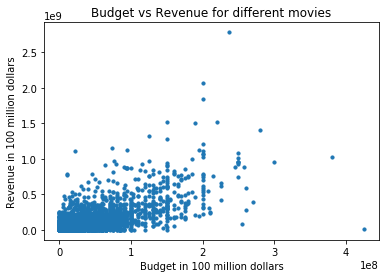

In [94]:
# I will try to find a correlation between budget and revenue earned by a movie

plt.scatter(df_movies.budget, df_movies.revenue, s=10)
plt.xlabel('Budget in 100 million dollars')
plt.ylabel('Revenue in 100 million dollars')
plt.title('Budget vs Revenue for different movies');

The plot looks confusing. Most of the budget and revenue dots seem to be concentrated towards the origin of the graph. 

Could there be a reason for this peculiar observation? Lets find out!

In [95]:
df_movies['budget'].median()

0.0

In [96]:
df_movies['revenue'].median()

0.0

In [97]:
df_movies['budget'].describe()

count    1.086500e+04
mean     1.462429e+07
std      3.091428e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [98]:
df_movies['revenue'].describe()

count    1.086500e+04
mean     3.982690e+07
std      1.170083e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [99]:
#There is a clear problem here.

#The budget and revenues in upto the median value is equal to zero. 

#The description of the dataset on Kaggle shows that the movies with a zero as the value in the budget and revenue column have a negligible amount of the former and latter (in comparison to movies which have hundreds of millions in budget and revenue).

#In order to have a clearer idea of the realtionships between the variables in the dataset, I will create two separate dataframes. 

#The first dataframe contains that half of the dataframe which has a budget greater than the median

#The second dataframe contains that half of the dataframe which has a budget lesser than the median

In [100]:
#Creating two separate dataframes.

#The first dataframe contains that half of the dataframe which has a budget greater than the median

#The second dataframe contains that half of the dataframe which has a budget lesser than the median

df_low = df_movies[df_movies.budget < df_movies.budget.median()]
df_high = df_movies[df_movies.budget > df_movies.budget.median()]

#### Finding the revenue of the part of the dataset which has a budget lower than the median

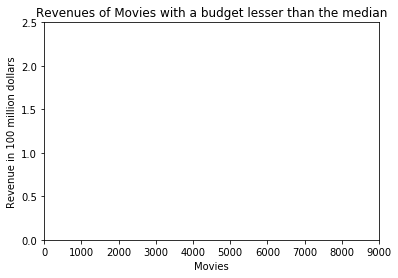

In [101]:
plt.plot(df_low['revenue'], scalex = False, scaley = False)
plt.xlabel("Movies")
plt.ylabel("Revenue in 100 million dollars")
plt.title("Revenues of Movies with a budget lesser than the median");
plt.xticks(np.arange(0,10000,1000));
plt.yticks(np.arange(0,3,0.5));

#### Finding the revenue of that part of the dataset which has a budget higher than the median

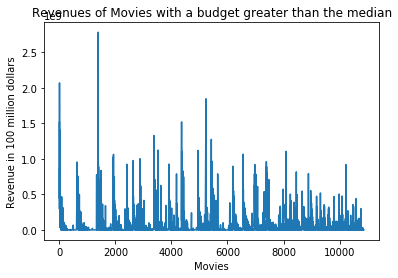

In [102]:
plt.plot(df_high['revenue']);
plt.ylabel("Revenue in 100 million dollars")
plt.xlabel("Movies")
plt.title("Revenues of Movies with a budget greater than the median");

#### It is very clear from the plots above that the movies with a budget greater than the median had a higher
#### revenue in comparison to the movies with a budget lower than the median which had no revenue at all !!

<a id='q2'></a>
## Research Question 2

## Does a higher budget correlate to a higher average vote?

In [103]:
df_high.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


##### Comparing the vote averages of movies with low budget and movies with high budget

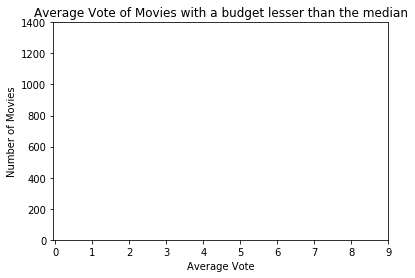

In [104]:
df_low['vote_average'].hist(grid = False);
plt.xlabel('Average Vote')
plt.ylabel('Number of Movies');
plt.title('Average Vote of Movies with a budget lesser than the median');
plt.xticks(np.arange(0,10));
plt.yticks(np.arange(0,1600,200));

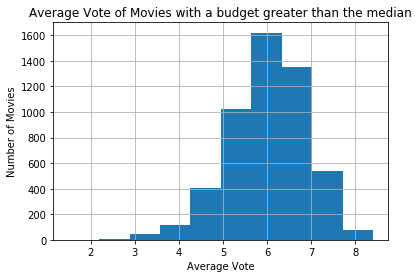

In [105]:
df_high['vote_average'].hist();
plt.xlabel('Average Vote')
plt.ylabel('Number of Movies');
plt.title('Average Vote of Movies with a budget greater than the median');

### Clearly, a higher budget correlates to a higher average vote

<a id='q3'></a>
## Research Question 3  

## Which Genres received the highest average vote? 

In [106]:
df_movies['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [107]:
genre_list = []
for i in range(100):
    a = []
    a = df_movies['genres'][i].split('|')
    genre_list.append(a)               
    

In [108]:
# creating a list with the distinct genres

In [109]:
new_list = []
for x in genre_list:
    for genre in x:
        if genre not in new_list:
            new_list.append(genre)
            continue
        else:
            continue        

In [110]:
#list of all the distinct genres
new_list

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror']

In [111]:
# For this research question, i will only consider the part of the original datafrmae which has a budget greater than the median.

#This is because the part of the dataset which has a budget lesser than the median contains genre names which have undesirable 
#floating point values.

In [112]:
df_high.reset_index(drop=True, inplace =True)

In [113]:
df_high

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94.0,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [114]:
df_high.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 15 columns):
popularity              5169 non-null float64
budget                  5169 non-null int64
revenue                 5169 non-null int64
original_title          5169 non-null object
cast                    5158 non-null object
director                5165 non-null object
runtime                 5166 non-null float64
genres                  5168 non-null object
production_companies    5033 non-null object
release_date            5169 non-null object
vote_count              5169 non-null int64
vote_average            5169 non-null float64
release_year            5169 non-null int64
budget_adj              5169 non-null float64
revenue_adj             5169 non-null float64
dtypes: float64(5), int64(4), object(6)
memory usage: 605.8+ KB


In [115]:
col_lst = []
for column in df_high:
    col_lst.append(column)

In [116]:
df_action = pd.DataFrame(columns = col_lst)
df_adventure = pd.DataFrame(columns = col_lst)
df_fantasy = pd.DataFrame(columns = col_lst)
df_crime = pd.DataFrame(columns = col_lst)
df_horror = pd.DataFrame(columns = col_lst)

In [117]:
for i in range(5100):
    
    if 'Action' in df_high['genres'][i].split('|'):
       
        df_action = df_action.append(df_high.iloc[i])
        
    elif 'Adventure' in df_high['genres'][i].split('|'):
        
        df_adventure = df_adventure.append(df_high.iloc[i])
        
    elif 'Fantasy' in df_high['genres'][i].split('|'):
        
        df_fantasy = df_fantasy.append(df_high.iloc[i])
        
    elif 'Crime' in df_high['genres'][i].split('|'):
        
        df_crime = df_crime.append(df_high.iloc[i])
        
    elif 'Horror' in df_high['genres'][i].split('|'):
        
        df_horror = df_horror.append(df_high.iloc[i])
        
    else :        
        continue
        

### Finding the average vote for different genres 

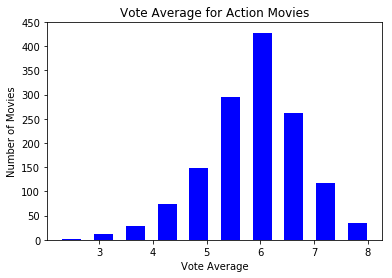

In [118]:
plt.hist(df_action['vote_average'], rwidth = 0.6,color = 'b')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.title('Vote Average for Action Movies');

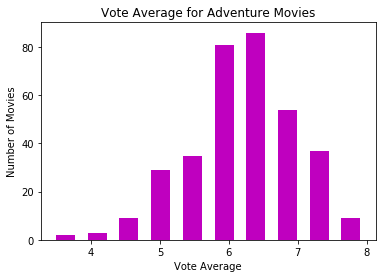

In [119]:
plt.hist(df_adventure['vote_average'], histtype = 'bar', rwidth = 0.6,color = 'm')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.title('Vote Average for Adventure Movies');

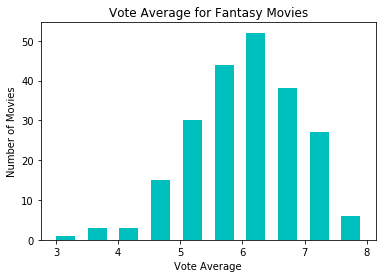

In [120]:
plt.hist(df_fantasy['vote_average'], histtype = 'bar', rwidth = 0.6,color='c')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.title('Vote Average for Fantasy Movies');

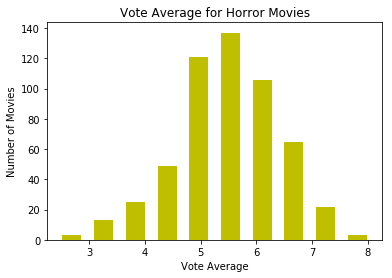

In [121]:
plt.hist(df_horror['vote_average'], histtype = 'bar', rwidth = 0.6,color='y')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.title('Vote Average for Horror Movies');

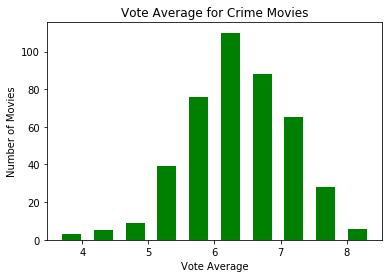

In [122]:
plt.hist(df_crime['vote_average'], histtype = 'bar', rwidth = 0.6,color='g')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.title('Vote Average for Crime Movies');

### The plots above show that the vote average for all the genres selected is roughly the same. A pie plot will illustrate it in a better way

In [123]:
slices_vote = [df_action.vote_average.mean(), df_adventure.vote_average.mean(), df_fantasy.vote_average.mean(), df_crime.vote_average.mean(), df_horror.vote_average.mean()]

In [124]:
genres = ['Action','Adventure','Fantasy','Crime','Horror']

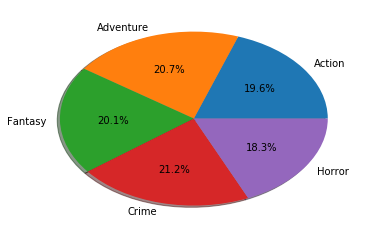

In [125]:
plt.pie(slices_vote, labels = genres, shadow = True, autopct = '%1.1f%%');

<a id='q4'></a>
## Research Question 4 

## What are the shares of revenue among the different movie genres?

In [126]:
slices = [df_action.revenue.median(), df_adventure.revenue.median(), df_fantasy.revenue.median(), df_crime.revenue.median(), df_horror.revenue.median()]

In [127]:
genres = ['Action','Adventure','Fantasy','Crime','Horror']

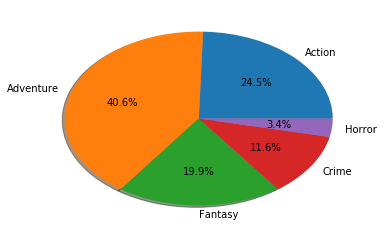

In [128]:
plt.pie(slices, labels = genres, shadow = True, autopct = '%1.1f%%');

In [129]:
slices1 = [df_action.revenue.mean(), df_adventure.revenue.mean(), df_fantasy.revenue.mean(), df_crime.revenue.mean(), df_horror.revenue.mean()]

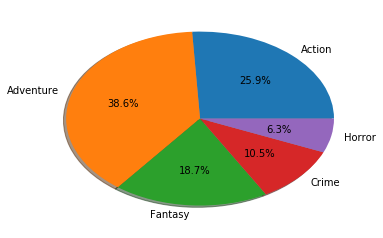

In [130]:
plt.pie(slices1, labels = genres, shadow = True, autopct = '%1.1f%%');

### The tests above show that Action and Adventure movies made the largest contribution to the share of revenues

<a id='q5'></a>
## Research Question 5

## Is there a correlation between movie runtimes and revenue? Is there a correlation between movie runtimes and the average vote received?

In [131]:
# creating two more dataframes

# dataframe which contains revenue greater than the median
df_high_rev = df_movies[df_movies.revenue > df_movies.revenue.median()]

# dataframe which contains revenue lesser than the median
df_low_rev = df_movies[df_movies.revenue < df_movies.revenue.median()]

In [132]:
df_movies.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [133]:
df_movies.runtime.describe()

count    10834.000000
mean       102.363855
std         30.948225
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

In [134]:
# Finding a relationship between movie runtime and revenue

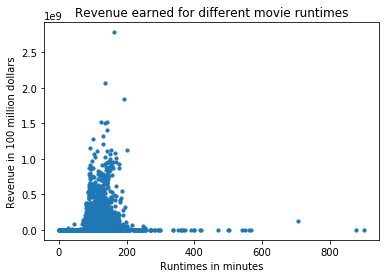

In [135]:
plt.scatter(df_movies.runtime, df_movies.revenue, s = 10);
plt.xlabel('Runtimes in minutes')
plt.ylabel('Revenue in 100 million dollars')
plt.title('Revenue earned for different movie runtimes');

#### There seems to be a correlation between movie runtimes and revenue

#### The movies with a runtime between (approx) 70 and 210 minutes seem to be the most common ones and have the highest revenue

#### Lets see the runtimes vs the revenues for movies with a revenue greater than the median

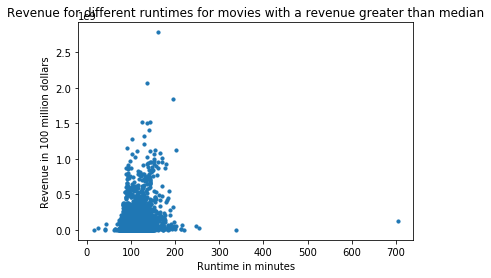

In [136]:
plt.scatter(df_high_rev.runtime, df_high_rev.revenue,s=10);
plt.xlabel('Runtime in minutes')
plt.ylabel('Revenue in 100 million dollars');
plt.title('Revenue for different runtimes for movies with a revenue greater than median');

#### The runtimes vs the revenues for movies with a revenue lesser than the median

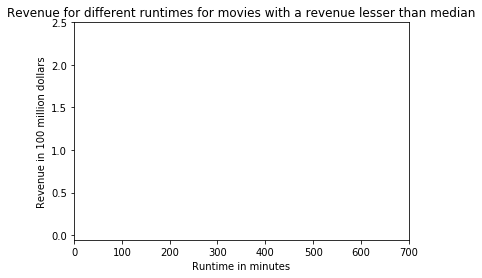

In [137]:
plt.scatter(df_low_rev.runtime, df_low_rev.revenue, s = 10);
plt.xlabel('Runtime in minutes')
plt.ylabel('Revenue in 100 million dollars')
plt.title('Revenue for different runtimes for movies with a revenue lesser than median');
plt.xticks(np.arange(0,800,100));
plt.yticks(np.arange(0,3,0.5));


#### This was expected because the movies with revenues below the median do not have a significant amount of revenue.

## Average Vote for Different movie runtimes

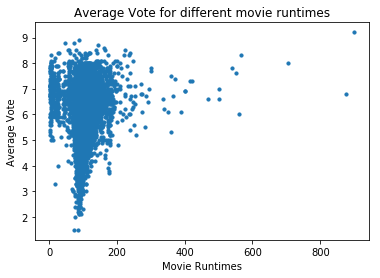

In [138]:
plt.scatter(df_movies.runtime, df_movies.vote_average, s = 10)
plt.xlabel('Movie Runtimes')
plt.ylabel('Average Vote')
plt.title('Average Vote for different movie runtimes');

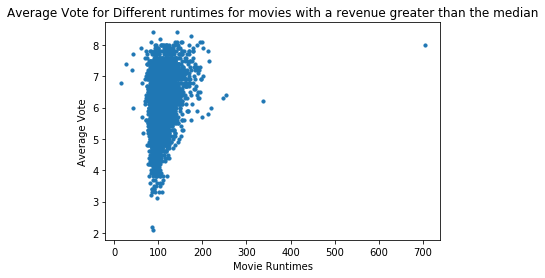

In [139]:
plt.scatter(df_high_rev.runtime, df_high_rev.vote_average, s = 10);
plt.xlabel('Movie Runtimes')
plt.ylabel('Average Vote')
plt.title('Average Vote for Different runtimes for movies with a revenue greater than the median');

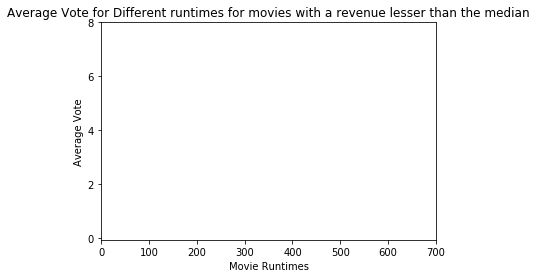

In [140]:
plt.scatter(df_low_rev.runtime, df_low_rev.vote_average, s = 10)
plt.xlabel('Movie Runtimes')
plt.ylabel('Average Vote')
plt.title('Average Vote for Different runtimes for movies with a revenue lesser than the median');
plt.xticks(np.arange(0,800,100))
plt.yticks(np.arange(0,10,2));

### Movies with a revenue greater than the median had a higher average vote in comparison to 
### the movies with a revenue lower than the median which had almost no average vote

<a id='conclusions'></a>
# Conclusions

## Here are the questions that have been answered using this dataset

### [1) How does a budget of a movie correlate to its revenue?](#q1)

### [2) Does a higher budget correlate to a higher average vote?](#q2)

### [3) Which Genres received the highest average vote?](#q3)

### [4) What are the shares of revenue among the different movie genres?](#q4)

### [5) Is there a correlation between movie runtimes and revenue? Is there a correlation between movie runtimes and the average vote received?](#q5)

### Limitations

This dataset does have a few limitations. 

There a many movies (almost half the movies in the dataset) which do not have any amount of budget or revenue. 
I could identify them as null values and drop almost half of my dataset but I retained those values to ensure the correctness
of the other relationships in my analysis. 

There are also many outliers in my graphs which are most likely to represent incorrectly supploed values in the dataset.



# Thank You !